In [1]:
%pylab inline

import numpy as np

from PIL import Image

import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


Populating the interactive namespace from numpy and matplotlib


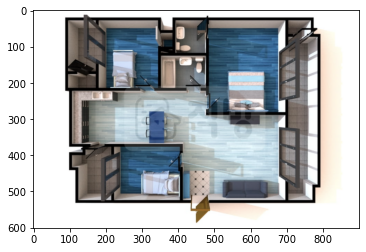

In [2]:
img_path = 'img/zigbang.png'
img = cv2.imread(img_path) #, cv2.IMREAD_COLOR)  #,cv2.COLOR_BGR2RGB )
plt.imshow(img)

In [3]:
img = cv2.imread(img_path) 
img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

In [4]:
template = cv2.imread('img/src.png')
template = cv2.cvtColor(template, cv2.IMREAD_GRAYSCALE) 
template

array([[[ 55,  95, 121, 255],
        [ 55,  94, 121, 255],
        [ 54,  93, 120, 255],
        ...,
        [ 67, 119, 165, 255],
        [ 68, 121, 167, 255],
        [ 69, 121, 168, 255]],

       [[ 47,  86, 113, 255],
        [ 49,  87, 114, 255],
        [ 49,  86, 113, 255],
        ...,
        [ 53, 102, 148, 255],
        [ 55, 105, 150, 255],
        [ 56, 106, 151, 255]],

       [[ 41,  78, 105, 255],
        [ 41,  79, 105, 255],
        [ 41,  78, 104, 255],
        ...,
        [ 42,  91, 135, 255],
        [ 43,  92, 136, 255],
        [ 45,  94, 138, 255]],

       ...,

       [[ 23,  38,  53, 255],
        [ 21,  37,  50, 255],
        [ 21,  36,  48, 255],
        ...,
        [117, 130, 149, 255],
        [ 90, 105, 124, 255],
        [ 48,  65,  82, 255]],

       [[  8,  16,  24, 255],
        [  6,  15,  22, 255],
        [  6,  14,  20, 255],
        ...,
        [ 58,  63,  75, 255],
        [ 48,  55,  66, 255],
        [ 24,  34,  45, 255]],

       [[  0

In [6]:
result = cv2.matchTemplate(img , template, cv2.TM_CCOEFF_NORMED)

minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(result)
x, y = minLoc
w, h = template.shape[:2]


startX, startY = maxLoc # 만약 cv.TM_SQDIFF 혹은 cv.TM_SQDIFF_NORMED를 사용했을경우 최솟값을 사용해야한다.
endX, endY = startX + w, startY + h
output = cv2.rectangle(img, (startX, startY), (endX, endY), (0,0,255), 1)

cv2.imwrite('result.png', img)


True

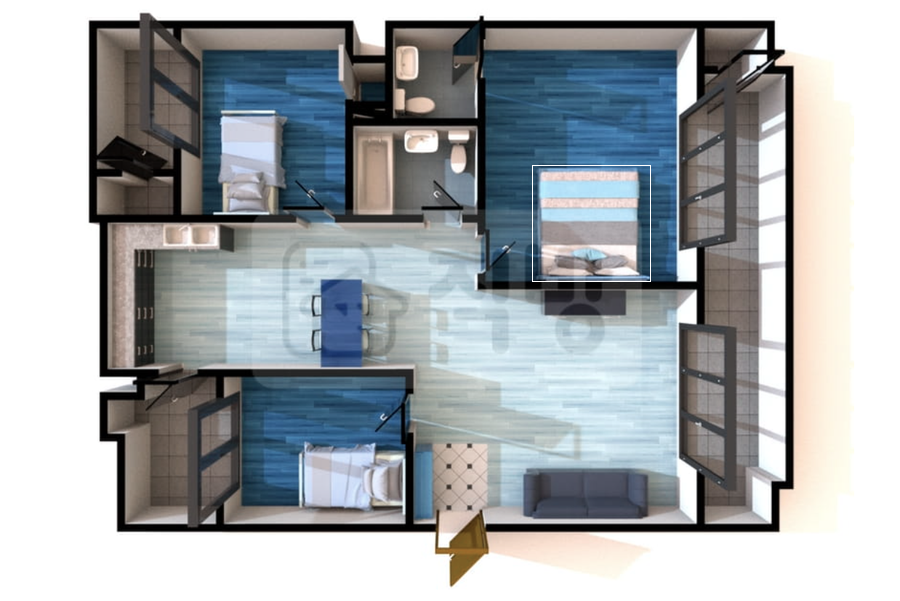

In [7]:
Image.fromarray(output) #, 'RGB')


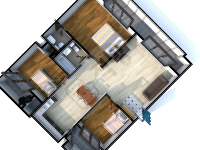

In [10]:
img = Image.open(img_path).resize((200, 150)).rotate(45)
img